# Supervised Learning Capstone: Mental Health in Tech

Describe your data set. Describe and explore your data set in the initial section of your Report. What does your data contain and what is its background? Where does it come from? Why is it interesting or significant? Conduct summary statistics and produce visualizations for the particular variables from the data set that you will use.

### Introduction

This data is extracted from __[Kaggle](https://www.kaggle.com/osmi/mental-health-in-tech-survey)__ It contains characteristics of various red and white wines and the quality of the wine.

### Research Interest

<b>Objective:</b> To use the variables of this dataset to predict if a person in Tech has sought treatment for a mental health condition.

<b>Original Features:</b>
-  <b>Timestamp</b>: Time survey was submitted
-  <b>Age</b>: Age of Responder
-  <b>Gender</b>: Gender of Responder
-  <b>Country</b>: Country of Responder
-  <b>state</b>: State of Responder
-  <b>self_employed</b>: Are they self employed?
-  <b>family_history</b>: Is there a family history of mental health conditions?
-  <b>treatment</b>: Have you sought treatment for a mental health condition?
-  <b>work_interfere</b>: If you have a mental health condition, do you feel that it interferes with your work?
-  <b>no_employees</b>: How many employees does your company or organization have?
-  <b>remote_work</b>: Do you work remotely (outside of an office) at least 50% of the time?
-  <b>tech_company</b>: Is your employer primarily a tech company/organization?
-  <b>benefits</b>: Does your employer provide mental health benefits?
-  <b>care_options</b>: Do you know the options for mental health care your employer provides? 
-  <b>wellness_program</b>: Has your employer ever discussed mental health as part of an employee wellness program?
-  <b>seek_help</b>: Does your employer provide resources to learn more about mental health issues and how to seek help?
-  <b>anonymity</b>: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
-  <b>leave</b>: How easy is it for you to take medical leave for a mental health condition?
-  <b>mental_health_consequence</b>: Do you think that discussing a mental health issue with your employer would have negative consequences?
-  <b>phys_health_consequence</b>: Do you think that discussing a physical health issue with your employer would have negative consequences?
-  <b>coworkers</b>: Would you be willing to discuss a mental health issue with your coworkers?
-  <b>supervisor</b>: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
-  <b>mental_health_interview</b>: Would you bring up a mental health issue with a potential employer in an interview?
-  <b>phys_health_interview</b>: Would you bring up a physical health issue with a potential employer in an interview?
-  <b>mental_vs_physical</b>: Do you feel that your employer takes mental health as seriously as physical health?
-  <b>obs_consequence</b>: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
-  <b>comments</b>: Any additional notes or comments

### Modules and Data Loading

In [297]:
#Import modules
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [298]:
df = pd.read_csv((r"C:\Users\genta\Desktop\Thinkful\SupervisedLearning\SupervisedLearningCapstone\mentalhealthintechsurvey.csv"))

In [299]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

### Data Exploration and Cleaning

<b>Explore the data. Get to know the data. You should understand how it was gathered, what's in it, and what the variables look like.

In [300]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

<b>There are 27 features and of those features 26 are objects and 1 is an integer.

In [301]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [302]:
#standardize all columns to lowercase for ease of use
df.columns = map(str.lower, df.columns)

#verify
df.columns

Index(['timestamp', 'age', 'gender', 'country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [303]:
#check values of only int, age

print("Age Values")
print("Minimum Age: ", df['age'].min())
print("Maximum Age: ", df['age'].max())
print("Average Age: ", df['age'].mean())
print("Null values: ", pd.isnull(df['age']).sum())

Age Values
Minimum Age:  -1726
Maximum Age:  99999999999
Average Age:  79428148.31135821
Null values:  0


<b>Age values are obviously off, and the outliers need to be fixed before any machine learning or analysis can be done.

In [304]:
#fix outlier issues for ages
def newage(age):
    if age>=1 and age<=90:
        return age
    else:
        return np.nan
df['age'] = df['age'].apply(newage)


#check age values again

print("Age Values")
print("Minimum Age: ", df['age'].min())
print("Maximum Age: ", df['age'].max())
print("Average Age: ", df['age'].mean())
print("Null values: ", pd.isnull(df['age']).sum())

Age Values
Minimum Age:  5.0
Maximum Age:  72.0
Average Age:  32.01913875598086
Null values:  5


In [305]:
#Check Missing Data
df.isnull().sum().sort_values(ascending=False)

comments                     1095
state                         515
work_interfere                264
self_employed                  18
age                             5
benefits                        0
gender                          0
country                         0
family_history                  0
treatment                       0
no_employees                    0
remote_work                     0
tech_company                    0
care_options                    0
obs_consequence                 0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
timestamp                       0
dtype: int64

In [306]:
#fill null values with avg age

df['age'].fillna(df['age'].mean(), inplace = True)


df['age']=df['age'].astype(int)

#check null again
print("Null values: ", pd.isnull(df['age']).sum())

Null values:  0


##### Check Distinct Values

In [307]:
#unique values
df.nunique()

timestamp                    1246
age                            48
gender                         49
country                        48
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      160
dtype: int64

In [308]:
#Gender
print("Distinct values for gender:\n", set(df['gender']))

Distinct values for gender:
 {'msle', 'Agender', 'femail', 'M', 'cis male', 'fluid', 'F', 'male', 'A little about you', 'Cis Man', 'Genderqueer', 'Enby', 'p', 'Female', 'All', 'Male', 'maile', 'Guy (-ish) ^_^', 'Trans woman', 'non-binary', 'Male ', 'male leaning androgynous', 'Cis Female', 'Female (cis)', 'woman', 'Female ', 'queer/she/they', 'female', 'ostensibly male, unsure what that really means', 'Female (trans)', 'Femake', 'Mal', 'Neuter', 'Trans-female', 'f', 'Male (CIS)', 'something kinda male?', 'Make', 'Woman', 'queer', 'Cis Male', 'Man', 'Androgyne', 'Male-ish', 'cis-female/femme', 'Mail', 'Nah', 'Malr', 'm'}


In [309]:
#Age
print("Distinct values for age:\n", set(df['age']))

Distinct values for age:
 {5, 8, 11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72}


In [310]:
#Country
print("Distinct values for country:\n", set(df['country']))

Distinct values for country:
 {'New Zealand', 'Colombia', 'Belgium', 'Georgia', 'Latvia', 'Hungary', 'Ireland', 'Costa Rica', 'Mexico', 'Greece', 'United States', 'Slovenia', 'Netherlands', 'Croatia', 'Denmark', 'Moldova', 'United Kingdom', 'France', 'Poland', 'Uruguay', 'Bosnia and Herzegovina', 'Sweden', 'Australia', 'Germany', 'Italy', 'Singapore', 'China', 'Finland', 'Spain', 'Japan', 'Bahamas, The', 'Israel', 'Norway', 'Philippines', 'Canada', 'Brazil', 'Czech Republic', 'Portugal', 'Bulgaria', 'Switzerland', 'Thailand', 'Romania', 'India', 'Nigeria', 'Zimbabwe', 'South Africa', 'Austria', 'Russia'}


<b>Gender as a distinct value seems too varied in spellings and classifications so I assume it would cause a problem. I decided to cleanse this data through strings and grouping of the values into categories.

In [311]:
#create gender groups

male= ["man","msle", "mail", "malr","male", "m", "male-ish", "maile", "mal", "male (cis)", 
       "make", "male ","cis man", "Cis Male", "cis male"]

female=["female ","cis-female/femme", "female (cis)", "femail", "cis female", "f", "female", 
        "woman",  "femake"]

other =["something kinda male?", "queer/she/they", "p","a little about you","non-binary","nah", "all", 
        "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", 
        "guy (-ish) ^_^",  "neuter",  "queer", "ostensibly male, unsure what that really means"]   

trans =["trans-female","trans woman","female (trans)"]

for (row, col) in df.iterrows():

    if str.lower(col.gender) in male:
        df['gender'].replace(to_replace=col.gender, value='male', inplace=True)

    if str.lower(col.gender) in female:
        df['gender'].replace(to_replace=col.gender, value='female', inplace=True)
    
    if str.lower(col.gender) in other:
        df['gender'].replace(to_replace=col.gender, value='other', inplace=True)
    
    if str.lower(col.gender) in trans:
        df['gender'].replace(to_replace=col.gender, value='trans', inplace=True)
        
 
#Gender
print("Distinct responses for gender:\n", set(df['gender']))

Distinct responses for gender:
 {'trans', 'female', 'other', 'male'}


<b>Handling Null Values

In [312]:
print("Distinct values for leave:\n", set(df['leave']))

Distinct values for leave:
 {'Very easy', 'Very difficult', 'Somewhat easy', 'Somewhat difficult', "Don't know"}


In [313]:
#Check Missing Data
df.isnull().sum().sort_values(ascending=False)

comments                     1095
state                         515
work_interfere                264
self_employed                  18
benefits                        0
age                             0
gender                          0
country                         0
family_history                  0
treatment                       0
no_employees                    0
remote_work                     0
tech_company                    0
care_options                    0
obs_consequence                 0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
timestamp                       0
dtype: int64

In [314]:
#drop timestamp, state, and comments

df = df.drop(['comments'], axis=1)
df = df.drop(['timestamp'], axis=1)
df = df.drop(['state'], axis=1)


<b>From the distinct print-outs above and the description of the data, I have decided to change the null values to unknown.


In [315]:

df['work_interfere'].fillna("Unknown",inplace = True) 
  
df['self_employed'].fillna("Unknown",inplace = True) 
  

In [316]:
#check Missing Data
df.isnull().sum().sort_values(ascending=False)

obs_consequence              0
mental_vs_physical           0
gender                       0
country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
age                          0
dtype: int64

In [317]:
df.columns

Index(['age', 'gender', 'country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [318]:
#unique values
df.nunique()

age                          48
gender                        4
country                      48
self_employed                 3
family_history                2
treatment                     2
work_interfere                5
no_employees                  6
remote_work                   2
tech_company                  2
benefits                      3
care_options                  3
wellness_program              3
seek_help                     3
anonymity                     3
leave                         5
mental_health_consequence     3
phys_health_consequence       3
coworkers                     3
supervisor                    3
mental_health_interview       3
phys_health_interview         3
mental_vs_physical            3
obs_consequence               2
dtype: int64

### Features

<b>Ages:</b> I want to create a feature that groups the ages.

In [319]:
#Group the ages into groups
df['age'] = pd.cut(df['age'],
                         [0,18, 25, 35, 45, 55, 65, 99],
                         labels=['<18','18-24','25-34','35-44','45-54', '55-64', '65+'])

<b>Although there are 48 countries mentioned, I did not want to group them simply because I believe that care and culture may differ too much among the countries and may negatively effect the data. 

<b>From here, I'd like to explore some visualizations before I decide to make any more features.

### Visualizations

<b>Label Encoding

In [320]:
from sklearn.preprocessing import LabelEncoder

age= LabelEncoder()
gender= LabelEncoder()
country= LabelEncoder()
state= LabelEncoder()
self_employed= LabelEncoder()
family_history= LabelEncoder()     
treatment=LabelEncoder() 
work_interfere= LabelEncoder()
no_employees= LabelEncoder()
remote_work= LabelEncoder()     
tech_company= LabelEncoder()
benefits= LabelEncoder()
care_options= LabelEncoder()
wellness_program= LabelEncoder()     
seek_help= LabelEncoder()
anonymity=LabelEncoder() 
leave= LabelEncoder()
mental_health_consequence=LabelEncoder()
phys_health_consequence= LabelEncoder()
coworkers=LabelEncoder()
supervisor=LabelEncoder()
mental_health_interview= LabelEncoder()
phys_health_interview=LabelEncoder()
mental_vs_physical= LabelEncoder()
obs_consequence=LabelEncoder()


df['age']=gender.fit_transform(df['age'])
df['gender']=gender.fit_transform(df['gender']) 
df['country']=country.fit_transform(df['country']) 

df['self_employed']=self_employed.fit_transform(df['self_employed'])  
df['family_history']=family_history.fit_transform(df['family_history'])       
df['treatment']=treatment.fit_transform(df['treatment'])  
df['work_interfere']=work_interfere.fit_transform(df['work_interfere'])  
df['no_employees']=no_employees.fit_transform(df['no_employees'])  
df['remote_work']=remote_work.fit_transform(df['remote_work'])       
df['tech_company']=tech_company.fit_transform(df['tech_company'])  
df['benefits']=benefits.fit_transform(df['benefits'])  
df['care_options']=care_options.fit_transform(df['care_options'])  
df['wellness_program']=wellness_program.fit_transform(df['wellness_program'])       
df['seek_help']=seek_help.fit_transform(df['seek_help'])  
df['anonymity']=anonymity.fit_transform(df['anonymity'])  
df['leave']=leave.fit_transform(df['leave'])  
df['mental_health_consequence']=mental_health_consequence.fit_transform(df['mental_health_consequence']) 
df['phys_health_consequence']=phys_health_consequence.fit_transform(df['phys_health_consequence'])  
df['coworkers']=coworkers.fit_transform(df['coworkers'])  
df['supervisor']=supervisor.fit_transform(df['supervisor']) 
df['mental_health_interview']=mental_health_interview.fit_transform(df['mental_health_interview'])  
df['phys_health_interview']=phys_health_interview.fit_transform(df['phys_health_interview']) 
df['mental_vs_physical']=mental_vs_physical.fit_transform(df['mental_vs_physical'])  
df['obs_consequence']=obs_consequence.fit_transform(df['obs_consequence']) 



#### Correlations

Text(0.5, 1.0, 'Mental Health in Tech Survey Correlations')

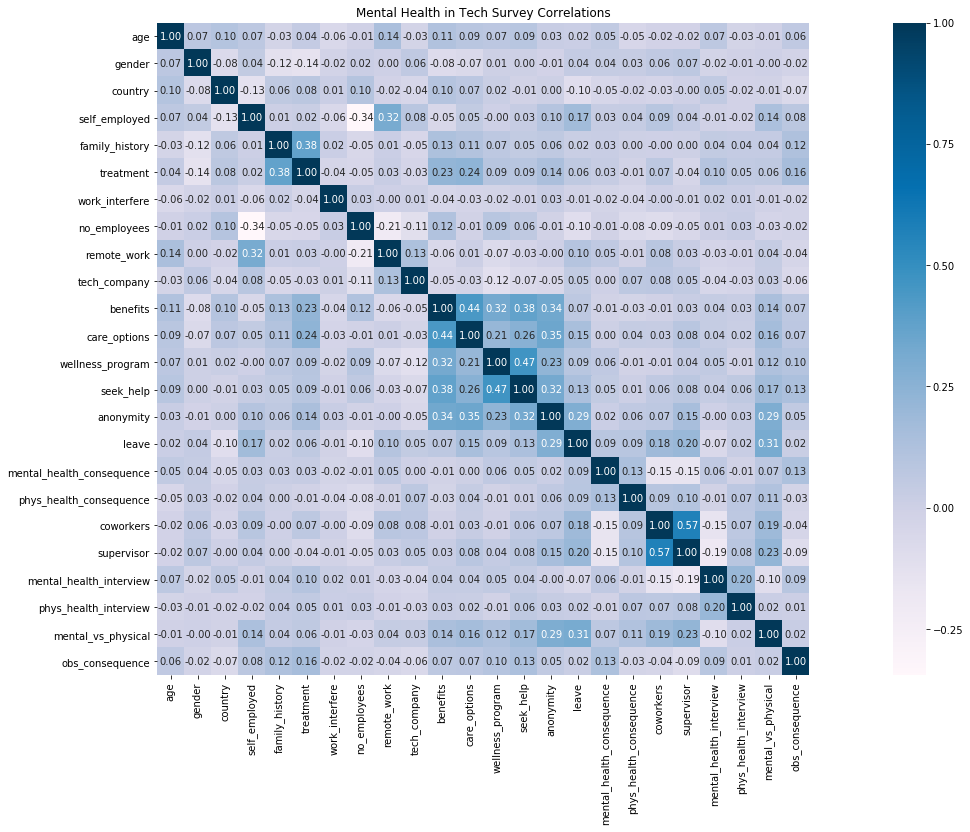

In [321]:
#Correlations

plt.figure(figsize=(30,12))
sns.heatmap(df.corr(),cmap = 'PuBu',annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.title('Mental Health in Tech Survey Correlations')

In [322]:
df.corr()

,age,gender,country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
age,1.000000,0.073748,0.101986,0.066404,-0.028172,0.042170,-0.060617,-0.008283,0.141116,-0.027465,...,0.025695,0.017103,0.052321,-0.049507,-0.016198,-0.015740,0.068288,-0.027476,-0.008420,0.056625
gender,0.073748,1.000000,-0.075970,0.044017,-0.120012,-0.136853,-0.021700,0.017603,0.001191,0.055629,...,-0.014585,0.039938,0.038749,0.032151,0.055144,0.068176,-0.024401,-0.006520,-0.000185,-0.023417
country,0.101986,-0.075970,1.000000,-0.125253,0.062107,0.077681,0.013885,0.098673,-0.017342,-0.041091,...,0.002034,-0.102454,-0.045102,-0.016538,-0.030811,-0.001308,0.052658,-0.016293,-0.011894,-0.070225
self_employed,0.066404,0.044017,-0.125253,1.000000,0.009715,0.020046,-0.056523,-0.344680,0.315369,0.083438,...,0.100647,0.170945,0.029709,0.038385,0.088454,0.043273,-0.008241,-0.017993,0.136131,0.078969
family_history,-0.028172,-0.120012,0.062107,0.009715,1.000000,0.377918,0.017420,-0.053635,0.014456,-0.046079,...,0.063679,0.022631,0.028196,0.002832,-0.000847,0.003729,0.044564,0.039894,0.041089,0.124861
treatment,0.042170,-0.136853,0.077681,0.020046,0.377918,1.000000,-0.035881,-0.050114,0.026937,-0.031525,...,0.142889,0.061549,0.030221,-0.008933,0.068433,-0.036199,0.098413,0.051859,0.062642,0.156972
work_interfere,-0.060617,-0.021700,0.013885,-0.056523,0.017420,-0.035881,1.000000,0.025174,-0.002943,0.005412,...,0.026233,-0.009474,-0.024745,-0.044877,-0.003023,-0.009130,0.021336,0.013808,-0.008124,-0.020989
no_employees,-0.008283,0.017603,0.098673,-0.344680,-0.053635,-0.050114,0.025174,1.000000,-0.211974,-0.111974,...,-0.008690,-0.098076,-0.011370,-0.075015,-0.090275,-0.052650,0.012454,0.025892,-0.030942,-0.020812
remote_work,0.141116,0.001191,-0.017342,0.315369,0.014456,0.026937,-0.002943,-0.211974,1.000000,0.131108,...,-0.002676,0.099669,0.054828,-0.009578,0.082438,0.025220,-0.029730,-0.014344,0.036591,-0.039065
tech_company,-0.027465,0.055629,-0.041091,0.083438,-0.046079,-0.031525,0.005412,-0.111974,0.131108,1.000000,...,-0.050912,0.047363,0.001336,0.066134,0.075383,0.049543,-0.041117,-0.032186,0.029191,-0.062347


In [323]:
from scipy import stats
stats.pearsonr(df.care_options, df.benefits)


(0.4412614675148797, 3.949380063257001e-61)

In [324]:
stats.pearsonr(df.coworkers,df.supervisor)

(0.5743100156595736, 2.232498173032926e-111)

In [325]:
df.describe()

,age,gender,country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1259.000000,1259.00000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,...,1259.000000,1259.000000,1259.000000,1259.000000,1259.00000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,1.193805,0.82367,37.792693,0.246227,0.390786,0.505957,2.335981,2.783161,0.298650,0.818904,...,0.647339,1.410643,0.853058,0.831612,0.97220,1.097697,0.870532,0.718030,0.814932,0.146148
std,0.887428,0.43756,13.320224,0.646422,0.488121,0.500163,1.373980,1.740247,0.457848,0.385251,...,0.908106,1.508507,0.767905,0.486954,0.62029,0.844407,0.427490,0.723718,0.834414,0.353395
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.00000,42.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.00000,45.000000,0.000000,0.000000,1.000000,3.000000,3.000000,0.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,2.000000,1.00000,45.000000,0.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.00000,2.000000,1.000000,1.000000,2.000000,0.000000
max,6.000000,3.00000,47.000000,2.000000,1.000000,1.000000,4.000000,5.000000,1.000000,1.000000,...,2.000000,4.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,1.000000


In [326]:
df.groupby('coworkers')['supervisor'].mean().sort_values(ascending=False)

coworkers
2    1.844444
1    1.152455
0    0.288462
Name: supervisor, dtype: float64

<b>From the correlation commands executed I see where there may be strong correlations, and I have an idea of which columns and values would be of high importance. At this point, I think it's time to start configuring models for supervised learning. I want to look at different regression models and see how the data looks before any further tuning or featuring is done. 

<b>Model your outcome of interest. You should try several different approaches and really work to tune a variety of models before using the model evaluation techniques to choose what you consider to be the best performer. Make sure to think about explanatory versus predictive power and experiment with both.

<b>Things to address:

-  A specified research question your model addresses
-  How you chose your model specification and what alternatives you compared it to
-  The practical uses of your model for an audience of interest
-  Any weak points or shortcomings of your model

#### A specified research question your model addresses

My model will address the question of whether the survey takers answers to any of the questions can be used to predict whether they have sought treatment for mental health conditions. I will test multiple models and compare them against each other and detemine which best predicts the answers to my question.

### Setup for Modelling

In [327]:
#Setup X and y

X= df.drop(['treatment'],1)
y=df['treatment']


In [328]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=50)


In [329]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(881, 23)
(881,)
(378, 23)
(378,)


<b>Logistic Regression

In [330]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

In [331]:
#print confusion matrix and accuracy score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(lr_acc_score*100)

[[116  62]
 [ 68 132]]
65.60846560846561


<b>Random Forest

In [332]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight=None,  n_jobs=100, random_state=50, n_estimators=400)
rfc.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=100,
            oob_score=False, random_state=50, verbose=0, warm_start=False)

In [333]:
pred_rfc = rfc.predict(X_test)

In [334]:
#Check accuracy
print("Random Forest Accuracy Score:",accuracy_score(y_test,pred_rfc )*100)

print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test,pred_rfc))

Random Forest Accuracy Score: 80.68783068783068
Random Forest Confusion Matrix:
 [[133  45]
 [ 28 172]]


<b>Support Vector

In [335]:
#Support vector
from sklearn.svm import SVC
svc = SVC(gamma='scale')
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [336]:
svc.score(X_train, y_train)

0.6617480136208853

In [337]:
from sklearn import ensemble

gbc = ensemble.GradientBoostingClassifier(n_estimators= 500,
          max_depth= 2,
          loss ='deviance')
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [338]:
pred_gbc = gbc.predict(X_test)
#Check accuracy
print("Gradient Boosting Classifiert Accuracy Score:",accuracy_score(y_test,pred_gbc )*100)

print("Gradient Boosting Classifier Confusion Matrix:\n", confusion_matrix(y_test,pred_gbc))

Gradient Boosting Classifiert Accuracy Score: 82.53968253968253
Gradient Boosting Classifier Confusion Matrix:
 [[136  42]
 [ 24 176]]


### Feature Importance

In [339]:
#finding important features
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [340]:
#Feature importance through RFC
feature_importances.importance.head(27)

work_interfere               0.265997
family_history               0.090796
care_options                 0.058235
country                      0.051300
no_employees                 0.051015
leave                        0.044033
benefits                     0.041089
age                          0.039721
phys_health_interview        0.033294
mental_health_consequence    0.031079
supervisor                   0.030814
coworkers                    0.030169
mental_vs_physical           0.029056
seek_help                    0.027550
gender                       0.027168
anonymity                    0.024527
wellness_program             0.024453
phys_health_consequence      0.020645
remote_work                  0.018918
mental_health_interview      0.018122
obs_consequence              0.016052
tech_company                 0.013531
self_employed                0.012438
Name: importance, dtype: float64

In [341]:
gbcffeature_importance = gbc.feature_importances_

#finding important features
gbcfeature_importances = pd.DataFrame(gbc.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [342]:
#top 30 features
gbcfeature_importances.importance.head(11)

work_interfere               0.679504
family_history               0.070346
country                      0.038612
care_options                 0.034926
gender                       0.017977
coworkers                    0.017334
no_employees                 0.017055
age                          0.015653
benefits                     0.013895
mental_health_consequence    0.013651
leave                        0.011694
Name: importance, dtype: float64

In [343]:
X1 = df[['work_interfere', 'family_history', 'care_options', 'no_employees',
         'country','age', 'benefits', 'coworkers', 'gender', 'anonymity',
        'supervisor', 'mental_health_consequence', 'leave']]
y1 = df['treatment']


In [344]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1, test_size=0.25, random_state=0)

In [345]:
#random forest

rfc1 = RandomForestClassifier(n_estimators=400)
rfc1.fit(X_train1, y_train1)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [346]:
pred_rfc1 = rfc1.predict(X_test1)
#Check accuracy
print("Random Forest Accuracy Score:",accuracy_score(y_test1,pred_rfc1 )*100)

print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test1,pred_rfc1))

Random Forest Accuracy Score: 80.95238095238095
Random Forest Confusion Matrix:
 [[119  42]
 [ 18 136]]


In [347]:
#combining columns?